In [191]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, Ridge,Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, confusion_matrix, accuracy_score, classification_report, roc_auc_score, f1_score, precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.linear_model import LinearRegression, LogisticRegression 

from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss

from collections import Counter
from sklearn.svm import SVC,SVR

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
#from sklearn import tree

In [192]:
# DATA LOADING AND UNDERSTANDING

In [193]:
data = pd.read_csv("C:/Users/VEENA SRI/ipl_matches.csv")

In [194]:
data

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [195]:
data.shape

(756, 18)

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [197]:
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [198]:
data.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [199]:
data.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [200]:
data.select_dtypes(include=["object"]).columns.tolist()

['Season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'winner',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [201]:
data.select_dtypes(include=["number"]).columns.tolist()

['id', 'dl_applied', 'win_by_runs', 'win_by_wickets']

In [202]:
# data.dtypes

In [203]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [204]:
# data["winner"].value_counts()

In [205]:
# DATA CLEANING

In [206]:
data.isna().sum().sort_values(ascending=False)

umpire3            637
city                 7
winner               4
player_of_match      4
umpire1              2
umpire2              2
Season               0
id                   0
team1                0
date                 0
dl_applied           0
result               0
toss_decision        0
toss_winner          0
team2                0
win_by_runs          0
win_by_wickets       0
venue                0
dtype: int64

In [207]:
data['year'] = data['Season'].str.split('-').str[1]

In [208]:
data['year'].unique()

array(['2017', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2018', '2019'], dtype=object)

In [209]:
# data['year'].nunique()

In [210]:
data['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [211]:
data['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [212]:
# data['city'].nunique()

In [213]:
# data[['city']] = data[['city']].replace('Bangalore', 'Bengaluru')

In [214]:
data['venue'].nunique()

41

In [215]:
dup_map = {'Rajiv Gandhi Intl. Cricket Stadium': 'Rajiv Gandhi International Stadium, Uppal',
           'Subrata Roy Sahara Stadium': 'Maharashtra Cricket Association Stadium',
           'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
           'IS Bindra Stadium': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
           'M Chinnaswamy Stadium': 'M. Chinnaswamy Stadium',  
           'MA Chidambaram Stadium, Chepauk': 'M. A. Chidambaram Stadium',
           'Feroz Shah Kotla Ground': 'Feroz Shah Kotla',
           'ACA-VDCA Stadium': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'}

In [216]:
data['venue'] = data['venue'].replace(dup_map)

In [217]:
data['player_of_match'].nunique()

226

In [218]:
# teams = data[['team1', 'team2']].values.ravel()

# team_count = pd.Series(teams).value_counts()
# print(team_count)

In [219]:
drop_columns = ["id", "city", "Season", "date", "umpire3"]
data = data.drop(columns = drop_columns)

In [220]:
# data = data.dropna(subset=['winner'])

In [221]:
data = data.dropna()

In [222]:
data['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [223]:
data[['team1', 'team2','toss_winner','winner']] = data[['team1', 'team2','toss_winner','winner']].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')

In [224]:
data[['team1', 'team2','toss_winner','winner']] = data[['team1', 'team2','toss_winner','winner']].replace('Pune Warriors', 'Rising Pune Supergiants')

In [225]:
data[['team1', 'team2','toss_winner','winner']] = data[['team1', 'team2','toss_winner','winner']].replace('Delhi Daredevils', 'Delhi Capitals')

In [226]:
unique_teams = pd.unique(data[['team1', 'team2', 'toss_winner', 'winner']].values.ravel()) 
print(unique_teams)

['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Capitals' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala']


In [227]:
duplicate_rows = data[data.duplicated(keep=False)]

In [228]:
duplicate_rows.sum().sum()

np.int64(0)

In [229]:
data.shape

(750, 14)

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 755
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team1            750 non-null    object
 1   team2            750 non-null    object
 2   toss_winner      750 non-null    object
 3   toss_decision    750 non-null    object
 4   result           750 non-null    object
 5   dl_applied       750 non-null    int64 
 6   winner           750 non-null    object
 7   win_by_runs      750 non-null    int64 
 8   win_by_wickets   750 non-null    int64 
 9   player_of_match  750 non-null    object
 10  venue            750 non-null    object
 11  umpire1          750 non-null    object
 12  umpire2          750 non-null    object
 13  year             750 non-null    object
dtypes: int64(3), object(11)
memory usage: 87.9+ KB


In [231]:
data

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,year
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,2017
1,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2017
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,2017
3,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,2017
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,C Shamshuddin,2019
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,2019
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,2019
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sundaram Ravi,Bruce Oxenford,2019


In [232]:
# OUTLIER

In [233]:
data['answer_valid']= data.apply (lambda row:row['winner'] in [row['team1'],row['team2']], axis=1)

In [234]:
# data['answer_valid'].nunique()

In [235]:
# data.drop(columns=['answer_valid'], inplace =True) 

In [236]:
numeric_column = data[["dl_applied","win_by_runs","win_by_wickets"]]

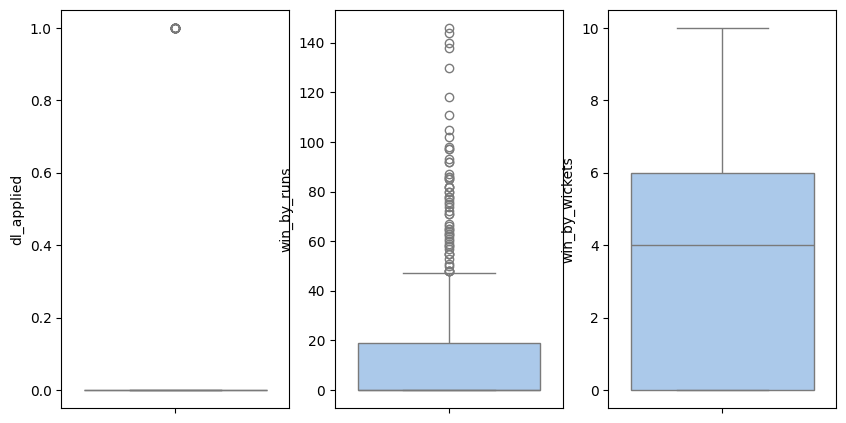

In [237]:
plt.figure(figsize=(10,30))
for i in range(len(numeric_column.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(y=numeric_column.columns[i],data = data, palette='pastel')
plt.show()

In [238]:
# #since classifier no need for pair plot

# plt.figure(figsize=(12,8))
# sns.pairplot(data)
# plt.title('PAIR PLOTS')
# plt.show()

In [239]:
# plt.figure(figsize=(8,4))
# sns.heatmap(numeric_column.corr(), annot= True, fmt='.2f')
# plt.show()

In [240]:
## UNIVARIATE ANALYSIS

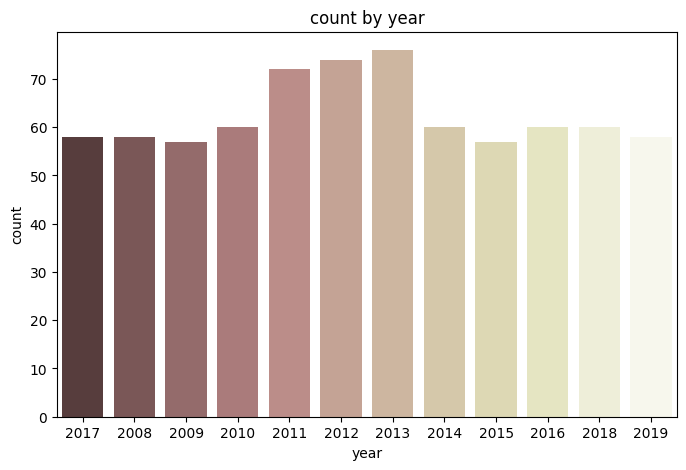

In [241]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x = 'year', palette = 'pink', data = data)
plt.xlabel('year')
plt.ylabel('count')
plt.title('count by year')
plt.show()

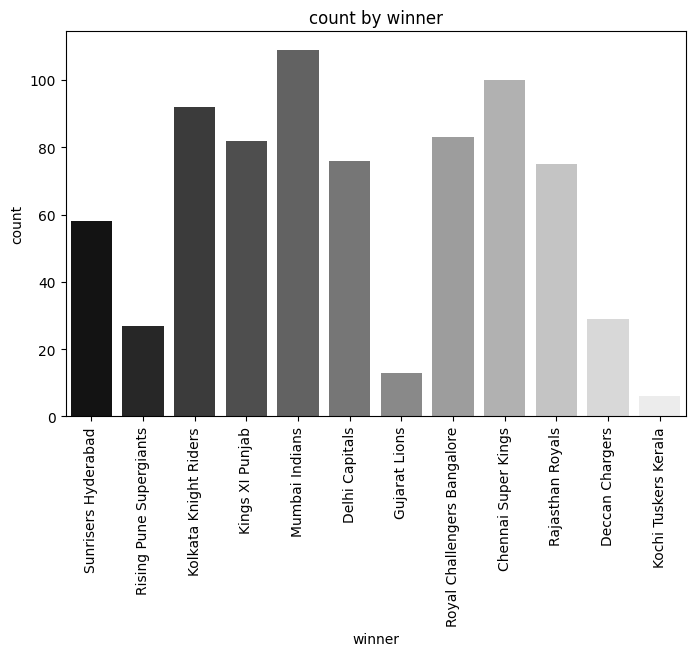

In [242]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x = 'winner', palette = 'grey', data = data)
plt.xlabel('winner')
plt.ylabel('count')
plt.title('count by winner')
plt.xticks(rotation=90)
plt.show()

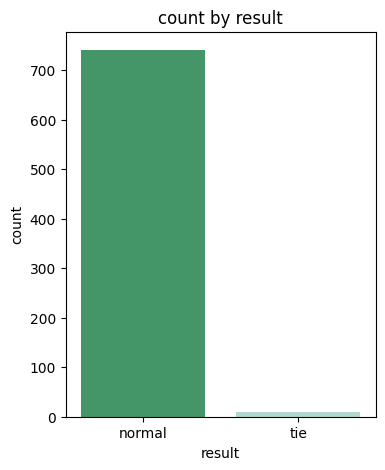

In [243]:
plt.figure(figsize=(4, 5))
ax = sns.countplot(x = 'result', palette = 'BuGn_r', data = data)
plt.xlabel('result')
plt.ylabel('count')
plt.title('count by result')
plt.show()

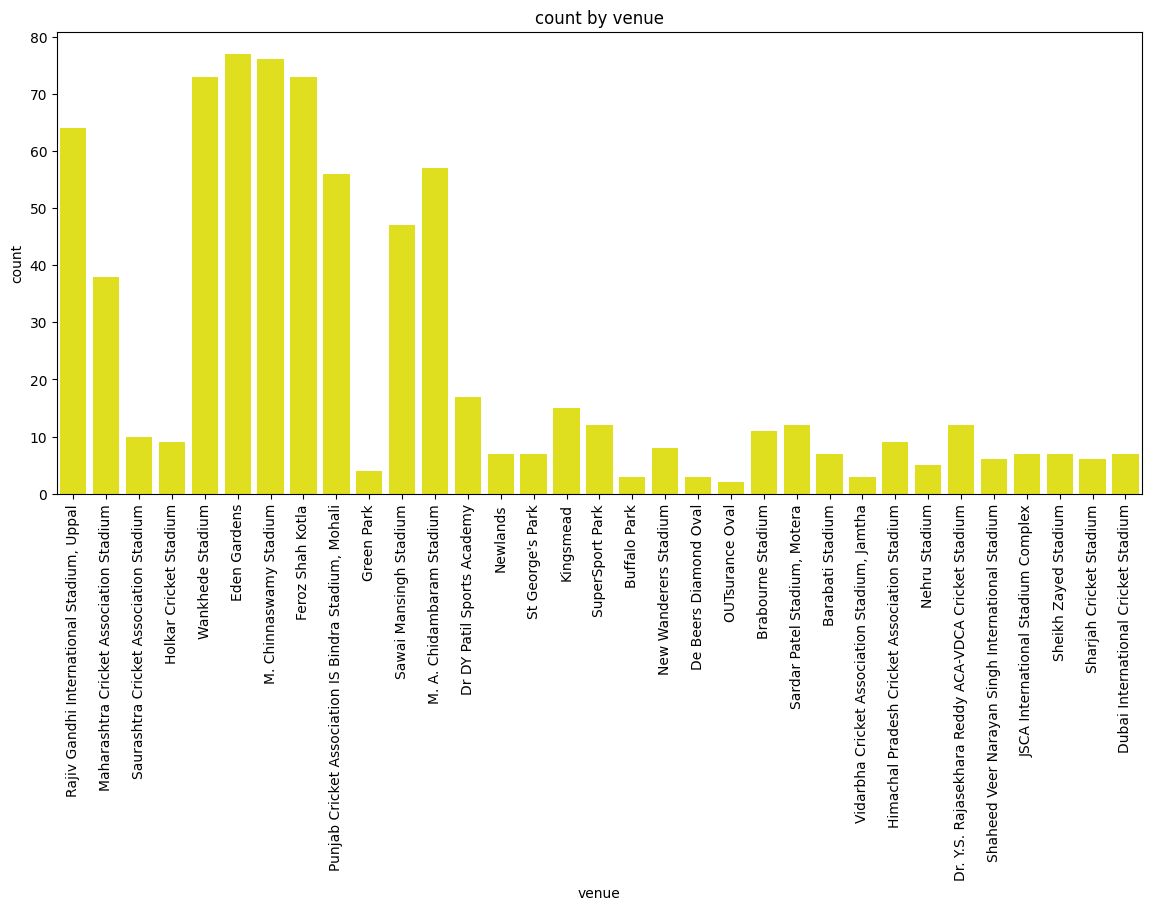

In [244]:
plt.figure(figsize=(14, 6))
sns.countplot(x='venue', data = data, color='yellow')
plt.xticks(rotation=90)
plt.xlabel('venue')
plt.ylabel('count')
plt.title('count by venue')
plt.show()

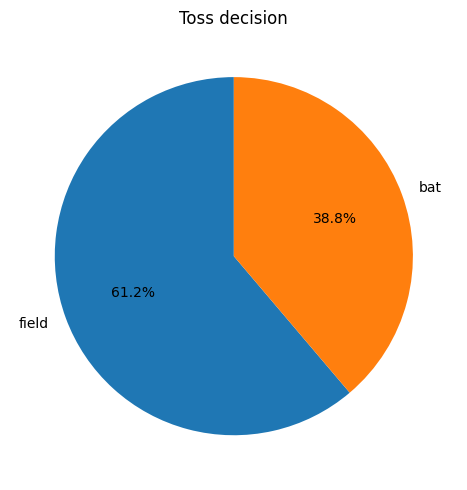

In [245]:
count = data['toss_decision'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(count.values, labels=count.index, autopct='%1.1f%%', startangle=90)
plt.title('Toss decision')
plt.tight_layout()  # keeps everything inside the figure area
plt.show()

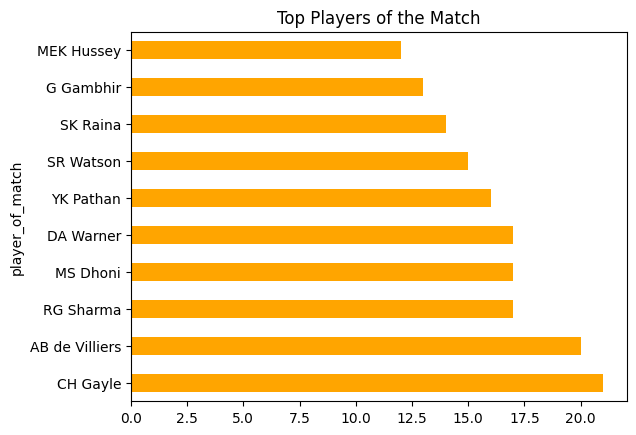

In [246]:
data['player_of_match'].value_counts().head(10).plot(kind='barh', title='Top Players of the Match', color = 'orange')
plt.show()

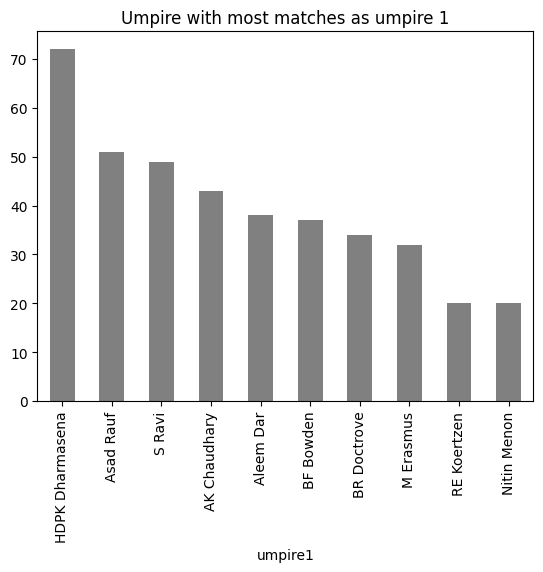

In [247]:
data['umpire1'].value_counts().head(10).plot(kind='bar', title='Umpire with most matches as umpire 1', color = 'grey')
plt.show()

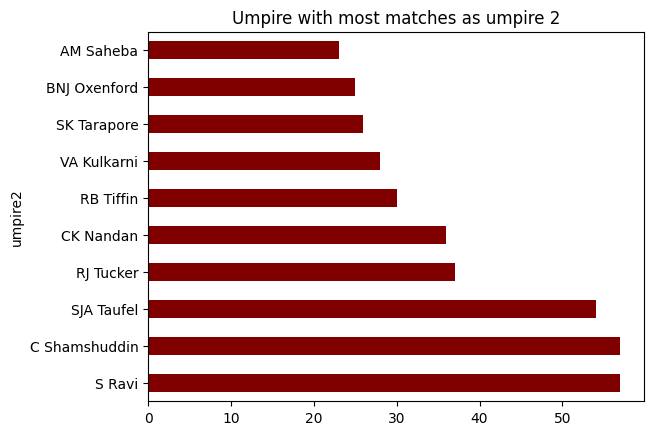

In [248]:
data['umpire2'].value_counts().head(10).plot(kind='barh', title='Umpire with most matches as umpire 2', color ='maroon')
plt.show()

In [249]:
# bivariate

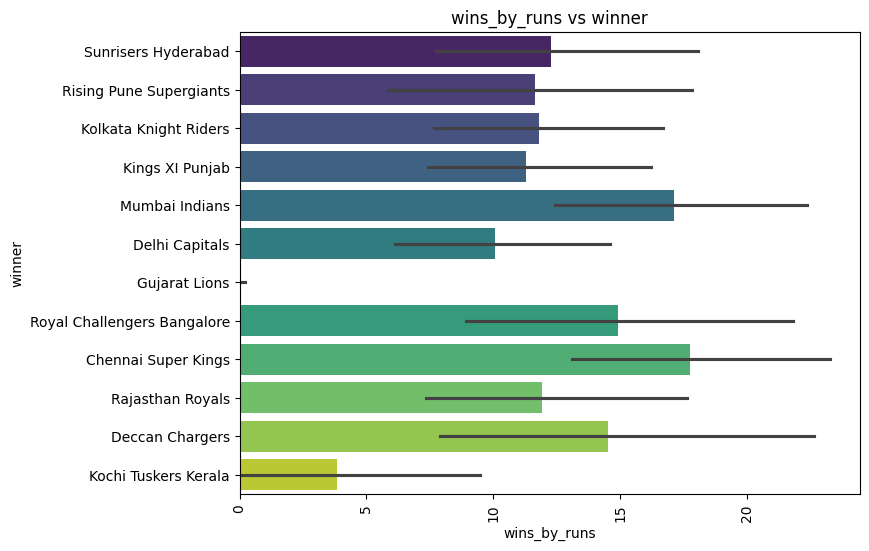

In [250]:
plt.figure(figsize=(8, 6))
sns.barplot(x='win_by_runs', y='winner', data = data, palette ='viridis')
plt.title("wins_by_runs vs winner")
plt.xlabel("wins_by_runs")
plt.ylabel("winner")
plt.xticks(rotation=90)
plt.show()

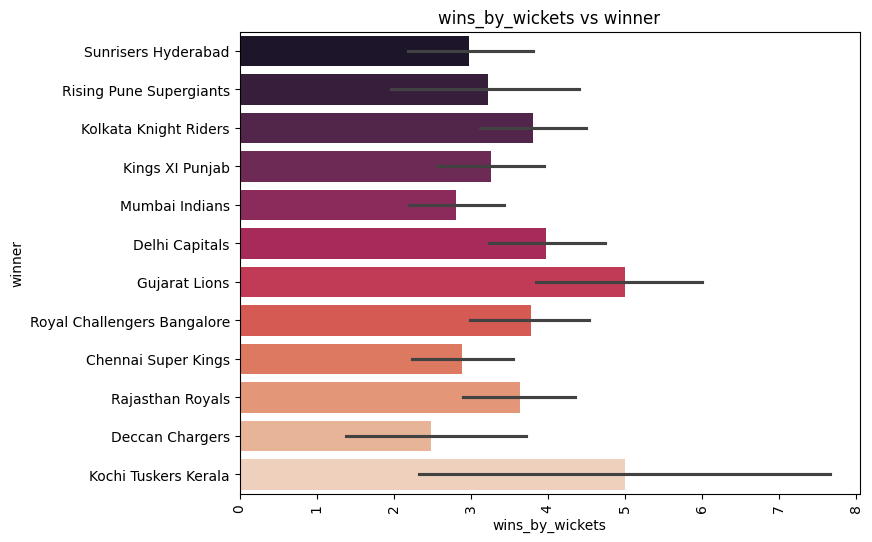

In [251]:
plt.figure(figsize=(8, 6))
sns.barplot(x='win_by_wickets', y='winner', data = data, palette ='rocket')
plt.title("wins_by_wickets vs winner")
plt.xlabel("wins_by_wickets")
plt.ylabel("winner")
plt.xticks(rotation=90)
plt.show()

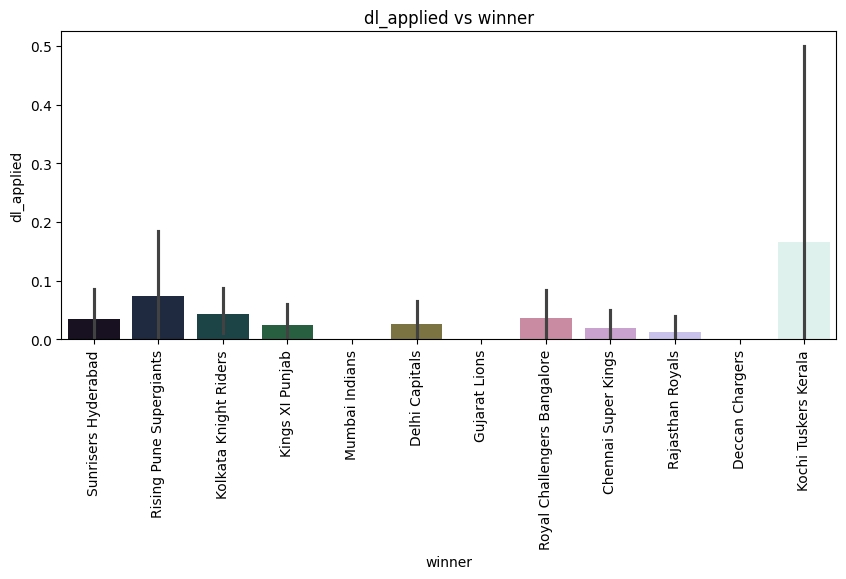

In [252]:
plt.figure(figsize=(10,4))
sns.barplot( x= 'winner', y= 'dl_applied', data = data, palette='cubehelix')
plt.title('dl_applied vs winner')
plt.xlabel('winner')
plt.ylabel('dl_applied')
plt.xticks(rotation=90),
plt.show()

In [253]:
# MULTIVARIATE

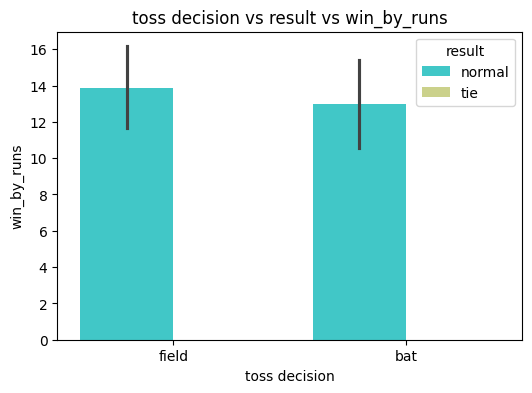

In [254]:
plt.figure(figsize=(6, 4))
sns.barplot(x='toss_decision', y='win_by_runs', hue='result', data = data, palette='rainbow')
plt.xlabel('toss decision')
plt.ylabel('win_by_runs')
plt.title('toss decision vs result vs win_by_runs')
plt.show()

In [255]:
# MACHINE LEARNING

In [256]:
#data_unique = pd.unique(data[['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'winner']].values.ravel())
#data_unique

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team1            750 non-null    object
 1   team2            750 non-null    object
 2   toss_winner      750 non-null    object
 3   toss_decision    750 non-null    object
 4   result           750 non-null    object
 5   dl_applied       750 non-null    int64 
 6   winner           750 non-null    object
 7   win_by_runs      750 non-null    int64 
 8   win_by_wickets   750 non-null    int64 
 9   player_of_match  750 non-null    object
 10  venue            750 non-null    object
 11  umpire1          750 non-null    object
 12  umpire2          750 non-null    object
 13  year             750 non-null    object
 14  answer_valid     750 non-null    bool  
dtypes: bool(1), int64(3), object(11)
memory usage: 88.6+ KB


In [258]:
# ENCODING

In [259]:
categorical_cols = ['team1','team2','toss_winner','toss_decision']
status = pd.get_dummies(data, columns = categorical_cols, drop_first=True)
x = status.drop(columns=['winner','venue', 'city', 'player_of_match', 'win_by_runs', 'win_by_wickets', 'umpire1', 'umpire2', 'dl_applied', 'result', 'date', 'year'], errors='ignore')

In [260]:
x

,answer_valid,team1_Deccan Chargers,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Rajasthan Royals,team1_Rising Pune Supergiants,...,toss_winner_Gujarat Lions,toss_winner_Kings XI Punjab,toss_winner_Kochi Tuskers Kerala,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
2,True,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
5,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
751,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
752,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
754,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [261]:
label = LabelEncoder()
y = data['winner'] =  label.fit_transform(data['winner'])

In [262]:
y

array([11,  9,  6,  4, 11,  7,  4,  2,  7,  6,  7,  3,  6,  2,  7,  9,  6,
       11, 10, 11,  7,  3,  7,  9,  4,  6,  9,  6,  3,  6, 11,  9,  7,  4,
       11,  7,  9,  2,  9,  2,  4,  9,  7,  6,  3, 11,  4,  2,  4,  2, 11,
        7,  9, 10,  9,  6,  7,  7,  6,  0,  2, 10,  6,  8,  2,  0,  8,  4,
        8,  0,  1,  4,  0,  7,  2,  4,  8,  2, 10,  4,  7,  8,  4,  1,  7,
        0,  6,  8,  7,  0,  6,  8,  4,  6,  7,  4,  2,  7,  4,  8,  7,  0,
        2,  8,  4, 10,  4,  2,  8, 10,  6,  8,  0,  8,  0,  8,  7, 10,  2,
        1,  0,  6,  1,  2,  8,  4,  1,  2,  4,  1,  7,  8, 10,  4,  2,  0,
        7, 10,  8,  0,  4, 10,  0,  8,  2,  1,  8,  0,  2,  4,  0,  7,  2,
        1, 10,  7,  2, 10,  8,  4,  0,  1,  4,  2,  6, 10,  6,  0,  2, 10,
        1, 10,  1,  6,  7,  2,  6,  1,  2, 10,  0,  7, 10,  0,  1,  8, 10,
        1,  4,  7, 10,  8,  7,  8,  6,  2,  8,  7,  2,  7,  0,  2,  6, 10,
        0,  7,  4,  2,  8,  0,  8,  6,  1,  4,  1, 10,  4,  7,  1,  7,  0,
       10,  2,  1,  7,  6

In [263]:
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size = 0.8, test_size = 0.2, stratify = y, random_state = 100)

In [264]:
count = Counter(y)
print(count)

Counter({np.int64(7): 109, np.int64(0): 100, np.int64(6): 92, np.int64(10): 83, np.int64(4): 82, np.int64(2): 76, np.int64(8): 75, np.int64(11): 58, np.int64(1): 29, np.int64(9): 27, np.int64(3): 13, np.int64(5): 6})


In [265]:
# logistic regression

In [266]:
# cross validation

model = LogisticRegression()
scores = cross_val_score(model, x_train, y_train, cv=5)
print(" logisticregression cross validation accuracy:", scores.mean())

 logisticregression cross validation accuracy: 0.5166666666666666


In [267]:
logistic = LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial', solver='lbfgs', n_jobs=-1)
logistic.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', n_jobs=-1)

In [268]:
# accuracy

y_train_pred = logistic.predict(x_train)
y_test_pred  = logistic.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test,  y_test_pred)

print(f"logisticregression train accuracy: {train_acc:.2f}")
print(f"logisticregression accuracy: {test_acc :.2f}")

logisticregression train accuracy: 0.64
logisticregression accuracy: 0.46


In [269]:
# Logistic=LogisticRegression(penalty='l2') #Ridge regularization
# Logistic.fit(x_train,y_train)
# class_pred = Logistic.predict((x_test))

# test_acc  = accuracy_score(y_test, class_pred)
# print(" logisticregression tuning accuracy :",test_acc)

In [270]:
Logistic=LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Logistic.fit(x_train,y_train)
class_pred=Logistic.predict((x_test))

test_acc  = accuracy_score(y_test, class_pred)
print("logisticregression tuning accuracy :",test_acc)

logisticregression tuning accuracy : 0.5133333333333333


In [271]:
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

grid_search=GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train,y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print(" logisticregression accuracy Score:", accuracy_score(y_test, y_pred))
print(" logisticregression best_model:", grid_search.best_estimator_)

 logisticregression accuracy Score: 0.5133333333333333
 logisticregression best_model: LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


In [272]:
# cm = confusion_matrix(y_test,  y_test_pred)
# cm

In [273]:
cr = classification_report(y_test, y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.62      0.25      0.36        20
           1       0.36      0.67      0.47         6
           2       0.29      0.13      0.18        15
           3       0.75      1.00      0.86         3
           4       0.42      0.31      0.36        16
           5       0.50      1.00      0.67         1
           6       0.50      0.44      0.47        18
           7       0.46      0.50      0.48        22
           8       0.37      0.47      0.41        15
           9       0.44      0.80      0.57         5
          10       0.50      0.47      0.48        17
          11       0.50      0.92      0.65        12

    accuracy                           0.46       150
   macro avg       0.48      0.58      0.50       150
weighted avg       0.46      0.46      0.44       150



In [274]:
# KNN

In [275]:
# cross validation

model = KNN()
scores = cross_val_score(model, x_train, y_train, cv=5)
print(" KNN cross validation accuracy:", scores.mean())

 KNN cross validation accuracy: 0.425


In [276]:
knn = KNN(n_neighbors=5, metric='hamming', p=2, n_jobs=-1)          
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='hamming', n_jobs=-1)

In [277]:
y_train_pred = knn.predict(x_train)
y_test_pred  = knn.predict(x_test)

print(f" KNN train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" KNN test  accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")


 KNN train accuracy: 0.63
 KNN test  accuracy: 0.40


In [278]:
# cm = confusion_matrix(y_test, y_test_pred)
# print("confusion matrix:", cm)

In [279]:
cr = classification_report(y_test, y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.29      0.80      0.43        20
           1       0.29      0.33      0.31         6
           2       0.38      0.20      0.26        15
           3       0.75      1.00      0.86         3
           4       0.45      0.31      0.37        16
           5       0.00      0.00      0.00         1
           6       0.58      0.39      0.47        18
           7       0.44      0.32      0.37        22
           8       0.50      0.40      0.44        15
           9       0.00      0.00      0.00         5
          10       0.44      0.41      0.42        17
          11       0.50      0.33      0.40        12

    accuracy                           0.40       150
   macro avg       0.38      0.37      0.36       150
weighted avg       0.42      0.40      0.39       150



In [280]:
def elbow(k):
    test_error = []
    for i in k:
       clf = KNN(n_neighbors = i)
       clf.fit(x_train, y_train)
       tmp = clf.predict(x_test)
       tmp = accuracy_score(tmp, y_test)
       error = 1-tmp
       test_error.append(error)

    return test_error   

In [281]:
k = list(range(2,20,2))
test = elbow(k)

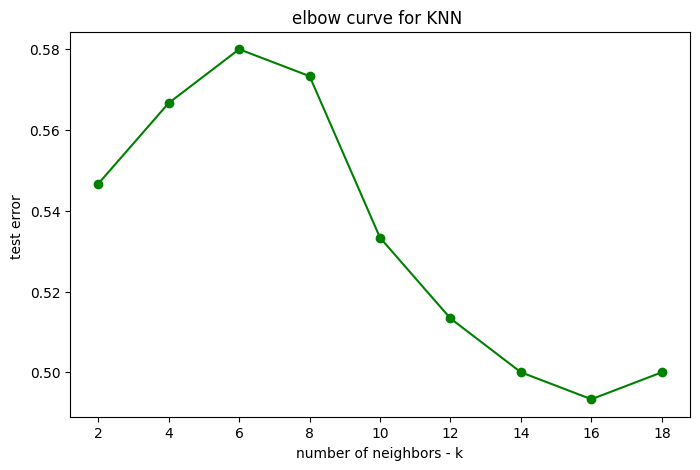

In [282]:
# plotting the curves

plt.figure(figsize=(8,5))
plt.plot(k, test, marker='o', color='green')
plt.xlabel('number of neighbors - k')
plt.ylabel('test error ')
plt.title('elbow curve for KNN ')
plt.show()

In [283]:
knn = KNN(n_neighbors= 16, metric='hamming', p=2, n_jobs=-1)          
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='hamming', n_jobs=-1, n_neighbors=16)

In [284]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

print(f" KNN train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" KNN test  accuracy: {accuracy_score(y_test,  y_test_pred):.2f}")


 KNN train accuracy: 0.54
 KNN test  accuracy: 0.51


In [285]:
# SVM

In [286]:
# cross validation

model = SVC()
scores = cross_val_score(model, x_train, y_train, cv=5)
print(" SVC cross validation accuracy:", scores.mean())

 SVC cross validation accuracy: 0.49833333333333335


In [287]:
svm = SVC(kernel='rbf', C=10, class_weight='balanced', random_state=100)
svm.fit(x_train, y_train)

SVC(C=10, class_weight='balanced', random_state=100)

In [288]:
y_train_pred = svm.predict(x_train)
y_test_pred  = svm.predict(x_test)

print(f" SVC train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" SVC test  accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 SVC train accuracy: 0.70
 SVC test  accuracy: 0.48


In [289]:
param_grid = {'C':[0.1,1,10,100], 'kernel':['linear','rbf'], 'gamma':['scale','auto']}
grid_search = GridSearchCV(estimator=SVC(),param_grid = param_grid, cv=10, verbose=2)
grid_search.fit(x_train,y_train)

best_param = grid_search.best_params_
best_score= grid_search.best_score_

print(f" SVM best hyperparameters: {best_param}")
print(f" SVM best score: {best_score:.2f}")

best_classifier = grid_search.best_estimator_
best_classifier.fit(x_train,y_train)



Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=sca

SVC(C=10, kernel='linear')

In [290]:
svm = SVC(kernel='linear', C=10, gamma ='scale', class_weight='balanced', random_state=100)
svm.fit(x_train, y_train)

y_train_pred = svm.predict(x_train)
y_test_pred  = svm.predict(x_test)

print(f" SVC tuned train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" SVC tuned test accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 SVC tuned train accuracy: 0.70
 SVC tuned test accuracy: 0.47


In [291]:
cr = classification_report(y_test, y_test_pred, digits=3)
print(cr)

              precision    recall  f1-score   support

           0      0.667     0.500     0.571        20
           1      0.300     0.500     0.375         6
           2      0.500     0.333     0.400        15
           3      0.750     1.000     0.857         3
           4      0.467     0.438     0.452        16
           5      0.333     1.000     0.500         1
           6      0.467     0.389     0.424        18
           7      0.500     0.500     0.500        22
           8      0.333     0.400     0.364        15
           9      0.375     0.600     0.462         5
          10      0.400     0.353     0.375        17
          11      0.533     0.667     0.593        12

    accuracy                          0.467       150
   macro avg      0.469     0.557     0.489       150
weighted avg      0.481     0.467     0.466       150



In [292]:
# cm = confusion_matrix(y_test, y_test_pred)
# print("confusion matrix:", cm)

In [293]:
# random forest

In [294]:
# cross validation

model = RandomForestClassifier()
scores = cross_val_score(model, x_train, y_train, cv=5)
print(" random forest cross validation accuracy:", scores.mean())

 random forest cross validation accuracy: 0.5


In [295]:
rf = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_leaf=2, class_weight='balanced', n_jobs=-1, random_state=100)
rf.fit(x_train, y_train)         

RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=300, n_jobs=-1, random_state=100)

In [296]:
y_train_pred = rf.predict(x_train)
y_test_pred  = rf.predict(x_test)

print(f" random forest train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" random forest test accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 random forest train accuracy: 0.65
 random forest test accuracy: 0.45


In [297]:
cr = classification_report(y_test, y_test_pred, digits=3)
print(cr)

              precision    recall  f1-score   support

           0      0.714     0.250     0.370        20
           1      0.364     0.667     0.471         6
           2      0.375     0.200     0.261        15
           3      0.750     1.000     0.857         3
           4      0.429     0.375     0.400        16
           5      0.333     1.000     0.500         1
           6      0.533     0.444     0.485        18
           7      0.429     0.409     0.419        22
           8      0.368     0.467     0.412        15
           9      0.400     0.800     0.533         5
          10      0.412     0.412     0.412        17
          11      0.524     0.917     0.667        12

    accuracy                          0.453       150
   macro avg      0.469     0.578     0.482       150
weighted avg      0.476     0.453     0.436       150



In [298]:
# print("confusion matrix:", confusion_matrix(y_test, y_test_pred))

In [299]:
param_grid={'n_estimators': [50,100,200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2,5,10]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(oob_score=True, random_state=100), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print(" random forest best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(x_test)
print(f" random forest best model accuracy:, {accuracy_score(y_test, y_pred_best):.2f}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
 random forest best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
 random forest best model accuracy:, 0.49


In [300]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_leaf=10, class_weight='balanced', n_jobs=-1, random_state=100)
rf.fit(x_train, y_train)  

y_train_pred = rf.predict(x_train)
y_test_pred  = rf.predict(x_test)

print(f" random forest tuned train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" random forest tuned test accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 random forest tuned train accuracy: 0.52
 random forest tuned test accuracy: 0.47


In [301]:
# descion tree

In [302]:
# cross validation

model = DecisionTreeClassifier()
scores = cross_val_score(model, x_train, y_train, cv=5)
print("cross-validation accuracy:", scores.mean())

cross-validation accuracy: 0.5083333333333334


In [303]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, class_weight='balanced', random_state=100)
dt.fit(x_train, y_train) 

DecisionTreeClassifier(class_weight='balanced', random_state=100)

In [304]:
y_train_pred = dt.predict(x_train)
y_test_pred  = dt.predict(x_test)

print(f" decision tree train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" decision tree test accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 decision tree train accuracy: 0.70
 decision tree test accuracy: 0.50


In [305]:
cr = classification_report(y_test, y_test_pred, digits=2)
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.30      0.50      0.38         6
           2       0.56      0.33      0.42        15
           3       0.75      1.00      0.86         3
           4       0.44      0.44      0.44        16
           5       0.50      1.00      0.67         1
           6       0.50      0.39      0.44        18
           7       0.52      0.50      0.51        22
           8       0.47      0.53      0.50        15
           9       0.38      0.60      0.46         5
          10       0.36      0.29      0.32        17
          11       0.56      0.75      0.64        12

    accuracy                           0.50       150
   macro avg       0.50      0.58      0.52       150
weighted avg       0.51      0.50      0.49       150



In [306]:
# print("confusion matrix:  ", confusion_matrix(y_test, y_test_pred))

In [307]:
dt_clf = DecisionTreeClassifier(random_state=100)

param_grid = {'max_depth': [3,5,10,None], 'criterion':['gini','entropy']}

grid_search = GridSearchCV(estimator = dt_clf, param_grid =param_grid, cv=5, scoring ='accuracy',n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
print(best_model)

y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

print('decision tree best parameters: ', grid_search.best_params_)
print('decision tree accuracy: ', accuracy)

DecisionTreeClassifier(max_depth=10, random_state=100)
decision tree best parameters:  {'criterion': 'gini', 'max_depth': 10}
decision tree accuracy:  0.47333333333333333


In [308]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, class_weight='balanced', random_state=100)
dt.fit(x_train, y_train) 

y_train_pred = dt.predict(x_train)
y_test_pred  = dt.predict(x_test)

print(f" decision tree train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" decision tree test accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 decision tree train accuracy: 0.45
 decision tree test accuracy: 0.37


In [309]:
# naive bayes

In [310]:
model =  BernoulliNB()
scores = cross_val_score(model, x_train, y_train, cv=5)
print(" NB cross validation accuracy:", scores.mean())

 NB cross validation accuracy: 0.5033333333333333


In [311]:
bnb = BernoulliNB() 
bnb.fit(x_train, y_train)

BernoulliNB()

In [312]:
y_train_pred = bnb.predict(x_train)
y_test_pred  = bnb.predict(x_test)

print(f" naivebayes train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" naivebayes test accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 naivebayes train accuracy: 0.54
 naivebayes test accuracy: 0.52


In [313]:
cr = classification_report(y_test, y_test_pred, digits=2)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.25      0.37        20
           1       0.50      0.67      0.57         6
           2       0.53      0.53      0.53        15
           3       0.75      1.00      0.86         3
           4       0.63      0.75      0.69        16
           5       0.50      1.00      0.67         1
           6       0.50      0.50      0.50        18
           7       0.43      0.45      0.44        22
           8       0.39      0.47      0.42        15
           9       0.40      0.40      0.40         5
          10       0.60      0.71      0.65        17
          11       0.45      0.42      0.43        12

    accuracy                           0.52       150
   macro avg       0.53      0.60      0.54       150
weighted avg       0.53      0.52      0.51       150



In [314]:
# print("confusion matrix:", confusion_matrix(y_test, y_test_pred))

In [315]:
nb = BernoulliNB()       
param_grid = {'alpha':[0.01, 0.1, 0.5, 1.0, 2.0], 'fit_prior':[True, False]}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv= 5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)  

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(" naivebayes best parameters :", grid_search.best_params_)
print(" naivebayes test accuracy :", accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 naivebayes best parameters : {'alpha': 0.5, 'fit_prior': True}
 naivebayes test accuracy : 0.52


In [316]:
bnb = BernoulliNB(alpha= 0.5, fit_prior= True) 
bnb.fit(x_train, y_train)

y_train_pred = bnb.predict(x_train)
y_test_pred  = bnb.predict(x_test)

print(f" naivebayes train accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f" naivebayes test accuracy: {accuracy_score(y_test,  y_test_pred ):.2f}")

 naivebayes train accuracy: 0.53
 naivebayes test accuracy: 0.52


In [317]:
# print("confusion matrix:",  confusion_matrix(y_test, y_pred))

In [318]:
# boosting - XGboost

In [319]:
model = XGBClassifier( )
scores = cross_val_score(model, x_train, y_train, cv=5)
print(" xgb boost cross validation accuracy:", scores.mean())

 xgb boost cross validation accuracy: 0.5166666666666667


In [320]:
xg = XGBClassifier(n_estimators=50, random_state=40)
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [321]:
ypt = xg.predict(x_train)
yp = xg.predict(x_test)

print(" xgb train accuracy:", accuracy_score(y_train, ypt))
print(" xgb test accuracy:", accuracy_score(y_test,yp))

 xgb train accuracy: 0.72
 xgb test accuracy: 0.5266666666666666


In [322]:
xgb = XGBClassifier( objective='multi:softprob', num_class=12, eval_metric='mlogloss', random_state=100, n_jobs=-1)

param_dist = {"n_estimators":[200, 800], "learning_rate":[0.01, 0.3], "max_depth":[3, 10]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

rnd = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100, cv=cv, n_jobs=-1, random_state=100)
rnd.fit(x_train, y_train)

best_xgb = rnd.best_estimator_
y_pred = best_xgb.predict(x_test)
# y_train_pred = best_xgb.predict(x_train)

print(" xgb hyper‑parameters :", rnd.best_params_)
# print(" xgb train accuracy :", f"{accuracy_score(y_train, y_train_pred):.2f}")
print(" xgb test accuracy :", f"{accuracy_score(y_test,  y_pred):.2f}")

 xgb hyper‑parameters : {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.3}
 xgb test accuracy : 0.54


In [323]:
xg = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.3, random_state=100)
xg.fit(x_train,y_train)

ypt = xg.predict(x_train)
yp = xg.predict(x_test)

print(" xgb train accuracy:", accuracy_score(y_train, ypt))
print(" xgb test accuracy:", accuracy_score(y_test,yp))

 xgb train accuracy: 0.7233333333333334
 xgb test accuracy: 0.54


In [324]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.50      0.33      0.40         6
           2       0.45      0.33      0.38        15
           3       0.75      1.00      0.86         3
           4       0.53      0.56      0.55        16
           5       0.50      1.00      0.67         1
           6       0.53      0.44      0.48        18
           7       0.52      0.59      0.55        22
           8       0.47      0.47      0.47        15
           9       0.43      0.60      0.50         5
          10       0.44      0.41      0.42        17
          11       0.57      0.67      0.62        12

    accuracy                           0.54       150
   macro avg       0.54      0.60      0.55       150
weighted avg       0.54      0.54      0.53       150



In [325]:
from sklearn.pipeline import make_pipeline

def without_venue_before_tuning(x_train, x_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial', solver='lbfgs', n_jobs=-1),
        "KNN": make_pipeline(KNN(n_neighbors=5, metric='hamming', p=2, n_jobs=-1)),
        "SVM": make_pipeline(SVC(kernel='linear', C=10, gamma ='scale', class_weight='balanced', random_state=100)),
        "Bernoulli NB":  BernoulliNB(),
        "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, class_weight='balanced', random_state=100),
        "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_leaf=2, class_weight='balanced', n_jobs=-1, random_state=100),
        "XGBoost":XGBClassifier(n_estimators=50, random_state=40)
    }

    rows = []
    for name, clf in models.items():
        clf.fit(x_train, y_train)
        rows.append({"model": name, "train accuracy": accuracy_score(y_train, clf.predict(x_train)), "test accuracy" : accuracy_score(y_test,  clf.predict(x_test))})

    return pd.DataFrame(rows).sort_values("test accuracy", ascending=False).reset_index(drop=True)

In [326]:
summary = without_venue_before_tuning(x_train, x_test, y_train, y_test)
print(" without venue before model tuning: \n  ",summary)

 without venue before model tuning: 
                    model  train accuracy  test accuracy
0              XGBoost        0.720000       0.526667
1         Bernoulli NB        0.535000       0.520000
2        Decision Tree        0.700000       0.500000
3                  SVM        0.696667       0.466667
4  Logistic Regression        0.640000       0.460000
5        Random Forest        0.651667       0.453333
6                  KNN        0.628333       0.400000


In [327]:
def without_venue_after_tuning(x_train, x_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(C=0.1, penalty='l1', solver='liblinear'),
        "KNN": make_pipeline(KNN(n_neighbors= 16, metric='hamming', p=2, n_jobs=-1)),
        "SVM": make_pipeline(SVC(kernel='rbf', C=10, class_weight='balanced', random_state=100)),
        "Bernoulli NB":  BernoulliNB(alpha= 0.5, fit_prior= True),
        "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, class_weight='balanced', random_state=100),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_leaf=10, class_weight='balanced', n_jobs=-1, random_state=100),
        "XGBoost": XGBClassifier( objective='multi:softprob', num_class=12, eval_metric='mlogloss', random_state=100, n_jobs=-1)
    }

    rows = []
    for name, clf in models.items():
        clf.fit(x_train, y_train)
        rows.append({"model": name, "train accuracy": accuracy_score(y_train, clf.predict(x_train)), "test accuracy" : accuracy_score(y_test,  clf.predict(x_test))})

    return pd.DataFrame(rows).sort_values("test accuracy", ascending=False).reset_index(drop=True)

In [328]:
summary1 = without_venue_after_tuning(x_train, x_test, y_train, y_test)
print(" without venue after model tuning: \n  ",summary1)

 without venue after model tuning: 
                    model  train accuracy  test accuracy
0         Bernoulli NB        0.528333       0.520000
1              XGBoost        0.721667       0.520000
2  Logistic Regression        0.548333       0.513333
3                  KNN        0.535000       0.506667
4                  SVM        0.696667       0.480000
5        Random Forest        0.520000       0.473333
6        Decision Tree        0.453333       0.366667


In [329]:
# gradiant boost

In [330]:
model = GradientBoostingClassifier( )
scores = cross_val_score(model, x_train, y_train, cv=5)
print(" gradiant boost cross validation accuracy:", scores.mean())

 gradiant boost cross validation accuracy: 0.5


In [331]:
grad = GradientBoostingClassifier(n_estimators=50, random_state=40)
grad.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=40)

In [332]:
yp = grad.predict(x_test)
ypt = grad.predict(x_train)

print(" gradiantboost train accuracy :",accuracy_score(y_train,ypt))
print(" gradiantboost test accuracy :",accuracy_score(y_test,yp))

 gradiantboost train accuracy : 0.6866666666666666
 gradiantboost test accuracy : 0.48


In [333]:
#adaboost

In [334]:
model = AdaBoostClassifier( )
scores = cross_val_score(model, x_train, y_train, cv=5)
print(" adaboost cross validation accuracy:", scores.mean())

 adaboost cross validation accuracy: 0.2916666666666667


In [335]:
ada = AdaBoostClassifier(n_estimators=50, random_state=100)
ada.fit(x_train, y_train)

AdaBoostClassifier(random_state=100)

In [336]:
yp = ada.predict(x_train)
yp = ada.predict(x_test)

print(" ada train accuracy:", accuracy_score(y_train, y_train_pred))
print(" ada test accuracy:", accuracy_score(y_test,yp))

 ada train accuracy: 0.5283333333333333
 ada test accuracy: 0.22666666666666666


In [337]:
# stump = DecisionTreeClassifier(max_depth=1, random_state=100, class_weight="balanced")

# ada = AdaBoostClassifier(estimator = stump, random_state = 100)

# param_grid = {"n_estimators":[50, 100, 200, 400], "learning_rate":[0.01, 0.05, 0.1, 0.5, 1.0], "estimator__max_depth":[1, 2, 3]}

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

# grid = GridSearchCV(estimator= ada, param_grid= param_grid, cv= cv, scoring="accuracy",n_jobs=-1, verbose=1)
# grid.fit(x_train, y_train)

# best_ada = grid.best_estimator_
# y_pred = best_ada.predict(x_test)
# y_train_pred = best_ada.predict(x_train)

# print(" ada best hyper‑parameters :", grid.best_params_)
# print(" ada train accuracy :", accuracy_score(y_train, y_train_pred))
# print(" ada test  accuracy :", accuracy_score(y_test,  y_pred))

In [338]:
ada = AdaBoostClassifier(n_estimators=400, learning_rate = 0.5, random_state=100)
ada.fit(x_train, y_train)

yp = ada.predict(x_train)
yp = ada.predict(x_test)

print(" ada train accuracy:", accuracy_score(y_train, y_train_pred))
print(" ada test accuracy:", accuracy_score(y_test,yp))

 ada train accuracy: 0.5283333333333333
 ada test accuracy: 0.2866666666666667


In [339]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.50      0.33      0.40         6
           2       0.45      0.33      0.38        15
           3       0.75      1.00      0.86         3
           4       0.53      0.56      0.55        16
           5       0.50      1.00      0.67         1
           6       0.53      0.44      0.48        18
           7       0.52      0.59      0.55        22
           8       0.47      0.47      0.47        15
           9       0.43      0.60      0.50         5
          10       0.44      0.41      0.42        17
          11       0.57      0.67      0.62        12

    accuracy                           0.54       150
   macro avg       0.54      0.60      0.55       150
weighted avg       0.54      0.54      0.53       150



In [340]:
ada=AdaBoostClassifier(n_estimators=50, estimator=LogisticRegression(), random_state=40)  
ada.fit(x_train,y_train)

yp=ada.predict(x_test)
print("accuracy :",accuracy_score(y_test,yp))

accuracy : 0.48


In [341]:
ada=AdaBoostClassifier(n_estimators=50, estimator=DecisionTreeClassifier(), random_state=40) 
ada.fit(x_train,y_train)

yp=ada.predict(x_test)
print("accuracy :",accuracy_score(y_test,yp))

accuracy : 0.5133333333333333


In [342]:
# ada=AdaBoostClassifier(n_estimators=50, estimator=SVC(), random_state=40) 
# ada.fit(x_train,y_train)

# yp=ada.predict(x_test)
# print("accuracy :",accuracy_score(y_test,yp))

In [343]:
# ada=AdaBoostClassifier(n_estimators=50, estimator=RandomForestClassifier(), random_state=40) 
# ada.fit(x_train,y_train)

# yp=ada.predict(x_test)
# print("accuracy:",accuracy_score(y_test,yp))

In [344]:
# ada=AdaBoostClassifier(n_estimators=50, estimator=BernoulliNB(), random_state=40) 
# ada.fit(x_train,y_train)

# yp=ada.predict(x_test)
# print("accuracy:",accuracy_score(y_test,yp))